<a href="https://colab.research.google.com/github/LearnAI-Pradipta/DataScienceProjects/blob/main/FRED_Data/income_distribution_top_1_percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OBJECTIVES :: The Project is to pull the data from Fred using their API service and create a data analysis project on USA Unemployment Rate of all different states.

### Importing Packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting only the Fred class from fredapi module
from fredapi import Fred

### Getting the Fred Key, create the Fred Object to connect the Fred API

In [3]:
# Get your own api key and replace
fred_api_key = ""
fred_obj = Fred(api_key=fred_api_key)

### Search for Unemployment Data using Fred Api

In [4]:
raw_unemp_ser = fred_obj.search('unemployment rate state',filter=('frequency','Monthly'))

raw_unemp_ser

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-01-16,2025-01-16,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-01-16,2025-01-16,Unemployment Rate,1948-01-01,2024-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-01-10 07:49:09-06:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-01-16,2025-01-16,Unemployment Rate - Black or African American,1972-01-01,2024-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-01-10 07:49:03-06:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2025-01-16,2025-01-16,Unemployment Level,1948-01-01,2024-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-01-10 07:49:04-06:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-01-16,2025-01-16,Unemployment Level,1948-01-01,2024-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-01-10 07:49:23-06:00,27,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INBART5URN,INBART5URN,2025-01-16,2025-01-16,"Unemployment Rate in Bartholomew County, IN",1990-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-01-03 10:14:08-06:00,2,These data come from the Current Population Su...
MOPRURN,MOPRURN,2025-01-16,2025-01-16,"Unemployment Rate in Perry County, MO",1990-01-01,2024-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-01-03 10:17:16-06:00,2,These data come from the Current Population Su...
PENS812UR,PENS812UR,2025-01-16,2025-01-16,Unemployment Rate in Pensacola-Ferry Pass-Bren...,1990-01-01,2024-11-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2025-01-03 13:32:32-06:00,1,None


### Filter data based on few addtional parameters. And then filter the dataframe where title contains 'Unemployment Rate in' string, just to filter data contains details of different states of USA

In [5]:
unemp_ftl_ser = raw_unemp_ser[(raw_unemp_ser['seasonal_adjustment'] == 'Seasonally Adjusted') & (raw_unemp_ser['units'] == 'Percent')]

unemp_state_ser = unemp_ftl_ser.loc[unemp_ftl_ser['title'].str.contains('Unemployment Rate in')]

# Filter the data frame where title column should not contain 'region' or 'division'. This is just to filter out dataset like 'Unemployment Rate in West Census Region' or 'Unemployment Rate in New England Census Division'
final_flt_unemp_state_ser = unemp_state_ser[~(unemp_state_ser['title'].str.lower().str.contains('region')  | unemp_state_ser['title'].str.lower().str.contains('division'))]

# Dropping couple of series from the dataframe. Those are city specific data and we dont need them as we are looking for state specific data. 
final_flt_unemp_state_ser.drop('LASMT261982000000003',inplace=True)
final_flt_unemp_state_ser.drop('LASMT391746000000003',inplace=True)

# # Check if the df has any duplicate entry in the Title column
final_flt_unemp_state_ser['title'].duplicated().any()

final_flt_unemp_state_ser

/var/folders/3s/5lv7ffr95k55ynb3y46bh1480000gn/T/ipykernel_2520/393966991.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_flt_unemp_state_ser.drop('LASMT261982000000003',inplace=True)
/var/folders/3s/5lv7ffr95k55ynb3y46bh1480000gn/T/ipykernel_2520/393966991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_flt_unemp_state_ser.drop('LASMT391746000000003',inplace=True)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2025-01-16,2025-01-16,Unemployment Rate in California,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:02-06:00,64,None
TXUR,TXUR,2025-01-16,2025-01-16,Unemployment Rate in Texas,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,56,None
NYUR,NYUR,2025-01-16,2025-01-16,Unemployment Rate in New York,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:03-06:00,53,None
FLUR,FLUR,2025-01-16,2025-01-16,Unemployment Rate in Florida,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,51,None
PAUR,PAUR,2025-01-16,2025-01-16,Unemployment Rate in Pennsylvania,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,44,None
OHUR,OHUR,2025-01-16,2025-01-16,Unemployment Rate in Ohio,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:04-06:00,41,None
MIUR,MIUR,2025-01-16,2025-01-16,Unemployment Rate in Michigan,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:05-06:00,38,None
ALUR,ALUR,2025-01-16,2025-01-16,Unemployment Rate in Alabama,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:05-06:00,38,None
MAUR,MAUR,2025-01-16,2025-01-16,Unemployment Rate in Massachusetts,1976-01-01,2024-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-12-23 09:31:06-06:00,37,None


### Looping through all the serieses and adding them in a single list 

In [6]:
all_unemp_results = []

for ser_id in final_flt_unemp_state_ser.index: 
    #Getting the Statename from the title by removing few words
    state_name = final_flt_unemp_state_ser.loc[ser_id]['title'].replace('Unemployment Rate in ','') 
    ser_result = fred_obj.get_series(ser_id)
    ser_result_df  = ser_result.to_frame(name=state_name)
    all_unemp_results.append(ser_result_df)    

# Concate all the list items of all_unemp_results, and append columns together
final_unemp_data_stetewise = pd.concat(all_unemp_results,axis=1) 

final_unemp_data_stetewise

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,...,2.6,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,3.8,...,2.7,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,...,2.7,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0
2024-10-01,5.4,4.1,4.4,3.3,3.4,4.3,4.6,2.9,3.9,3.7,...,2.7,3.0,3.7,2.5,4.6,3.4,3.2,4.0,2.3,1.9


In [7]:
final_unemp_data_stetewise

# Check if any data is null in the dataframe
final_unemp_data_stetewise.isna().sum(axis=1)

# Creating a new feature column called Year just to keep the Year as an item
final_unemp_data_stetewise['Year'] = final_unemp_data_stetewise.index.year

final_unemp_data_stetewise.head(20)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota,Year
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,1976
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3,1976
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2,1976
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,...,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1,1976
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,...,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1,1976
1976-06-01,9.0,5.9,10.2,9.2,8.0,7.6,9.4,6.5,9.8,6.0,...,9.3,5.6,6.5,7.7,4.1,3.8,8.6,8.4,3.1,1976
1976-07-01,9.0,5.9,10.2,9.1,7.9,7.5,9.2,6.6,9.6,5.9,...,9.1,5.6,6.4,7.8,4.1,3.7,8.8,8.3,3.2,1976
1976-08-01,9.1,5.8,10.2,9.1,7.9,7.5,9.1,6.7,9.4,5.9,...,9.0,5.6,6.4,8.0,4.1,3.7,8.9,8.2,3.3,1976
1976-09-01,9.2,5.7,10.2,9.1,7.9,7.5,9.0,6.8,9.2,6.0,...,8.8,5.6,6.3,8.2,4.1,3.7,9.0,8.0,3.4,1976
1976-10-01,9.3,5.7,10.2,9.1,7.9,7.5,9.0,6.9,9.1,6.2,...,8.7,5.7,6.3,8.4,4.1,3.7,9.1,7.9,3.5,1976


### Check data on state level. Data From 1976 to 2024

In [8]:
# Identify the Min. Unemployment Rate and corresponding dates for every single states
df_min_unemp_details_state = pd.DataFrame(columns=['State','List Of Dates','Min. Unemployment Rate'])
indx = 0
for key,value in final_unemp_data_stetewise.items(): 
    if key == 'Year':
        continue  
    # Adding a series into the specific location of the dataframe. 
    df_min_unemp_details_state.loc[indx] = {'State': key,'List Of Dates':final_unemp_data_stetewise[final_unemp_data_stetewise[key] == value.min()][key].index.date, 'Min. Unemployment Rate' : value.min()}
    indx+=1

df_min_unemp_details_state

,State,List Of Dates,Min. Unemployment Rate
0,California,[2022-08-01],3.8
1,Texas,"[2019-05-01, 2019-06-01]",3.4
2,New York,"[2019-05-01, 2019-06-01]",3.7
3,Florida,"[2006-01-01, 2006-02-01, 2006-03-01, 2006-04-0...",2.4
4,Pennsylvania,"[2023-06-01, 2023-07-01]",3.2
5,Ohio,"[2023-05-01, 2023-06-01]",3.3
6,Michigan,[2000-02-01],3.2
7,Alabama,"[2023-02-01, 2023-03-01, 2023-04-01, 2023-05-0...",2.3
8,Massachusetts,"[2000-07-01, 2000-08-01, 2000-09-01, 2000-10-0...",2.7
9,North Carolina,"[1999-02-01, 1999-03-01]",3.1


### Based on the above data, create a Scattered plot to show the minimum Unemployment rate per state. 

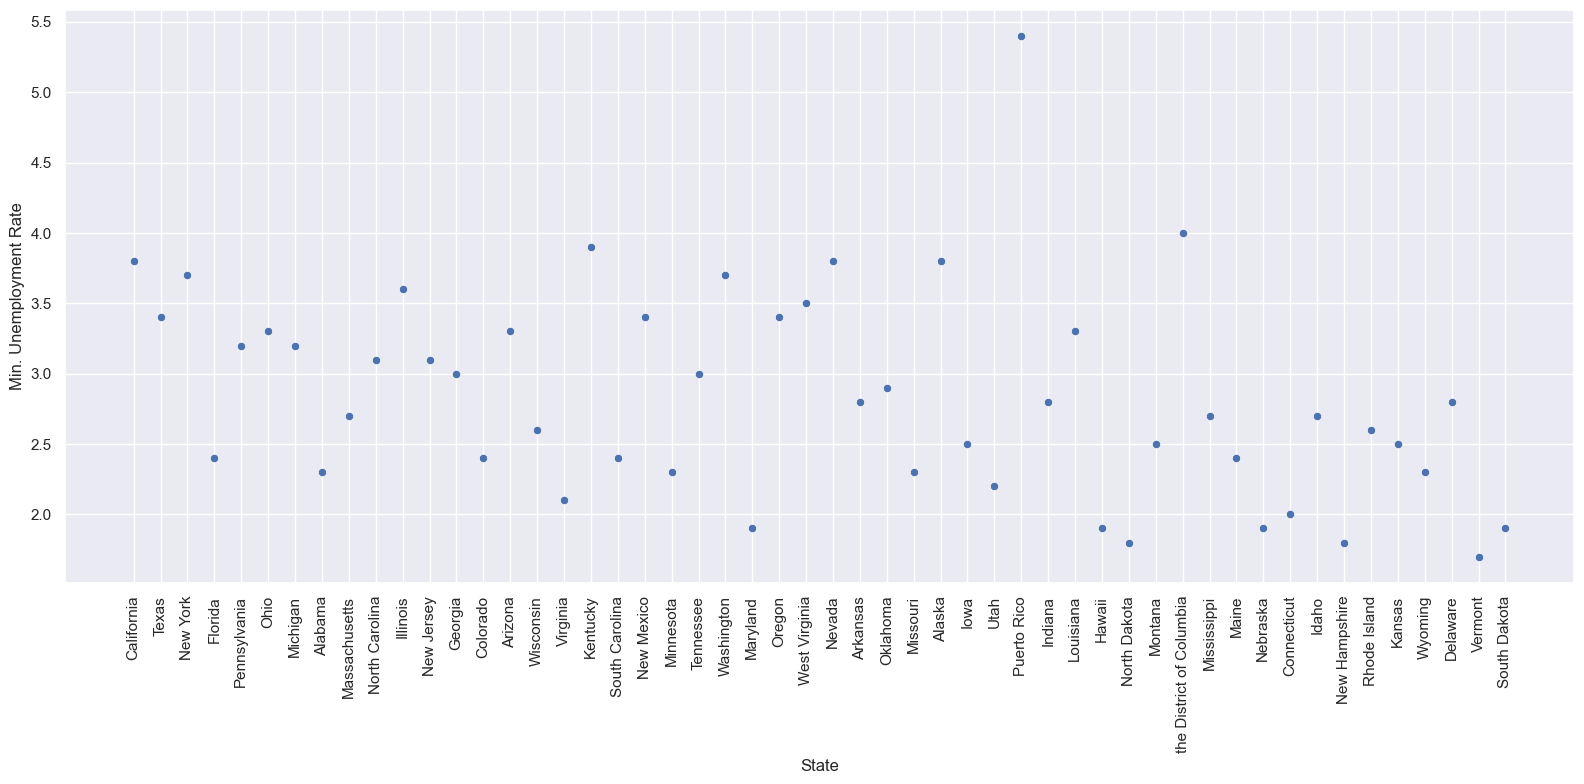

In [9]:
# Defining the Seaborn figure size
sns.set_theme(rc={'figure.figsize':(16, 8)}) 
sns.scatterplot(data=df_min_unemp_details_state, x='State',y="Min. Unemployment Rate")
# Rotating the x lable texts to diplay the content vertically
plt.xticks(rotation=90)
plt.tight_layout()

#plt.show()

### Find year wise average unemployment rate for every state and plot a line chart for all the states individually. 

In [122]:
df_median_unemp_rate_by_year = final_unemp_data_stetewise.groupby('Year').median()

df_median_unemp_rate_by_year

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
Year,,,,,,,,,,,,,,,,,,,,,
1976,9.15,5.80,10.20,9.15,8.00,7.55,9.30,6.60,9.70,6.25,...,3.10,9.20,5.60,6.45,7.80,4.15,3.80,8.70,8.35,3.30
1977,8.35,5.30,9.05,8.30,7.70,6.30,8.20,7.30,7.85,5.85,...,3.35,6.90,5.90,5.60,8.05,3.90,3.15,8.10,6.95,3.35
1978,7.15,4.80,7.75,6.75,6.90,5.50,7.00,6.35,6.05,4.45,...,2.80,5.20,5.40,3.85,6.15,3.00,2.80,7.10,5.55,3.25
1979,6.20,4.40,7.10,5.95,6.90,5.85,7.60,7.25,5.40,4.80,...,2.95,5.10,5.80,3.15,6.30,3.10,2.50,6.95,4.90,3.40
1980,7.10,5.35,7.50,6.10,8.25,8.95,12.75,9.10,5.90,6.60,...,4.00,5.85,7.70,4.75,7.30,4.60,3.80,7.70,6.05,5.05
1981,7.15,5.30,7.60,6.65,8.10,9.15,12.20,10.40,6.25,6.20,...,4.00,6.10,7.40,4.80,7.35,4.35,4.10,7.70,5.80,4.80
1982,10.10,6.80,8.55,8.45,10.75,12.50,15.20,14.00,7.80,9.15,...,5.50,6.90,9.80,6.95,10.05,6.50,5.90,8.40,6.90,5.45
1983,9.85,8.25,9.00,8.80,11.15,12.50,14.60,13.90,6.90,8.80,...,5.50,6.00,9.10,5.40,8.50,5.75,8.25,8.00,6.55,5.20
1984,7.70,6.10,7.20,6.50,8.95,9.35,11.15,11.30,4.65,6.50,...,4.40,4.60,7.25,4.20,5.15,5.00,6.30,6.20,4.75,4.35


### Get year wise average unemployment rate for every state. Display a lineplot for all the states based on the average unemployment rate.

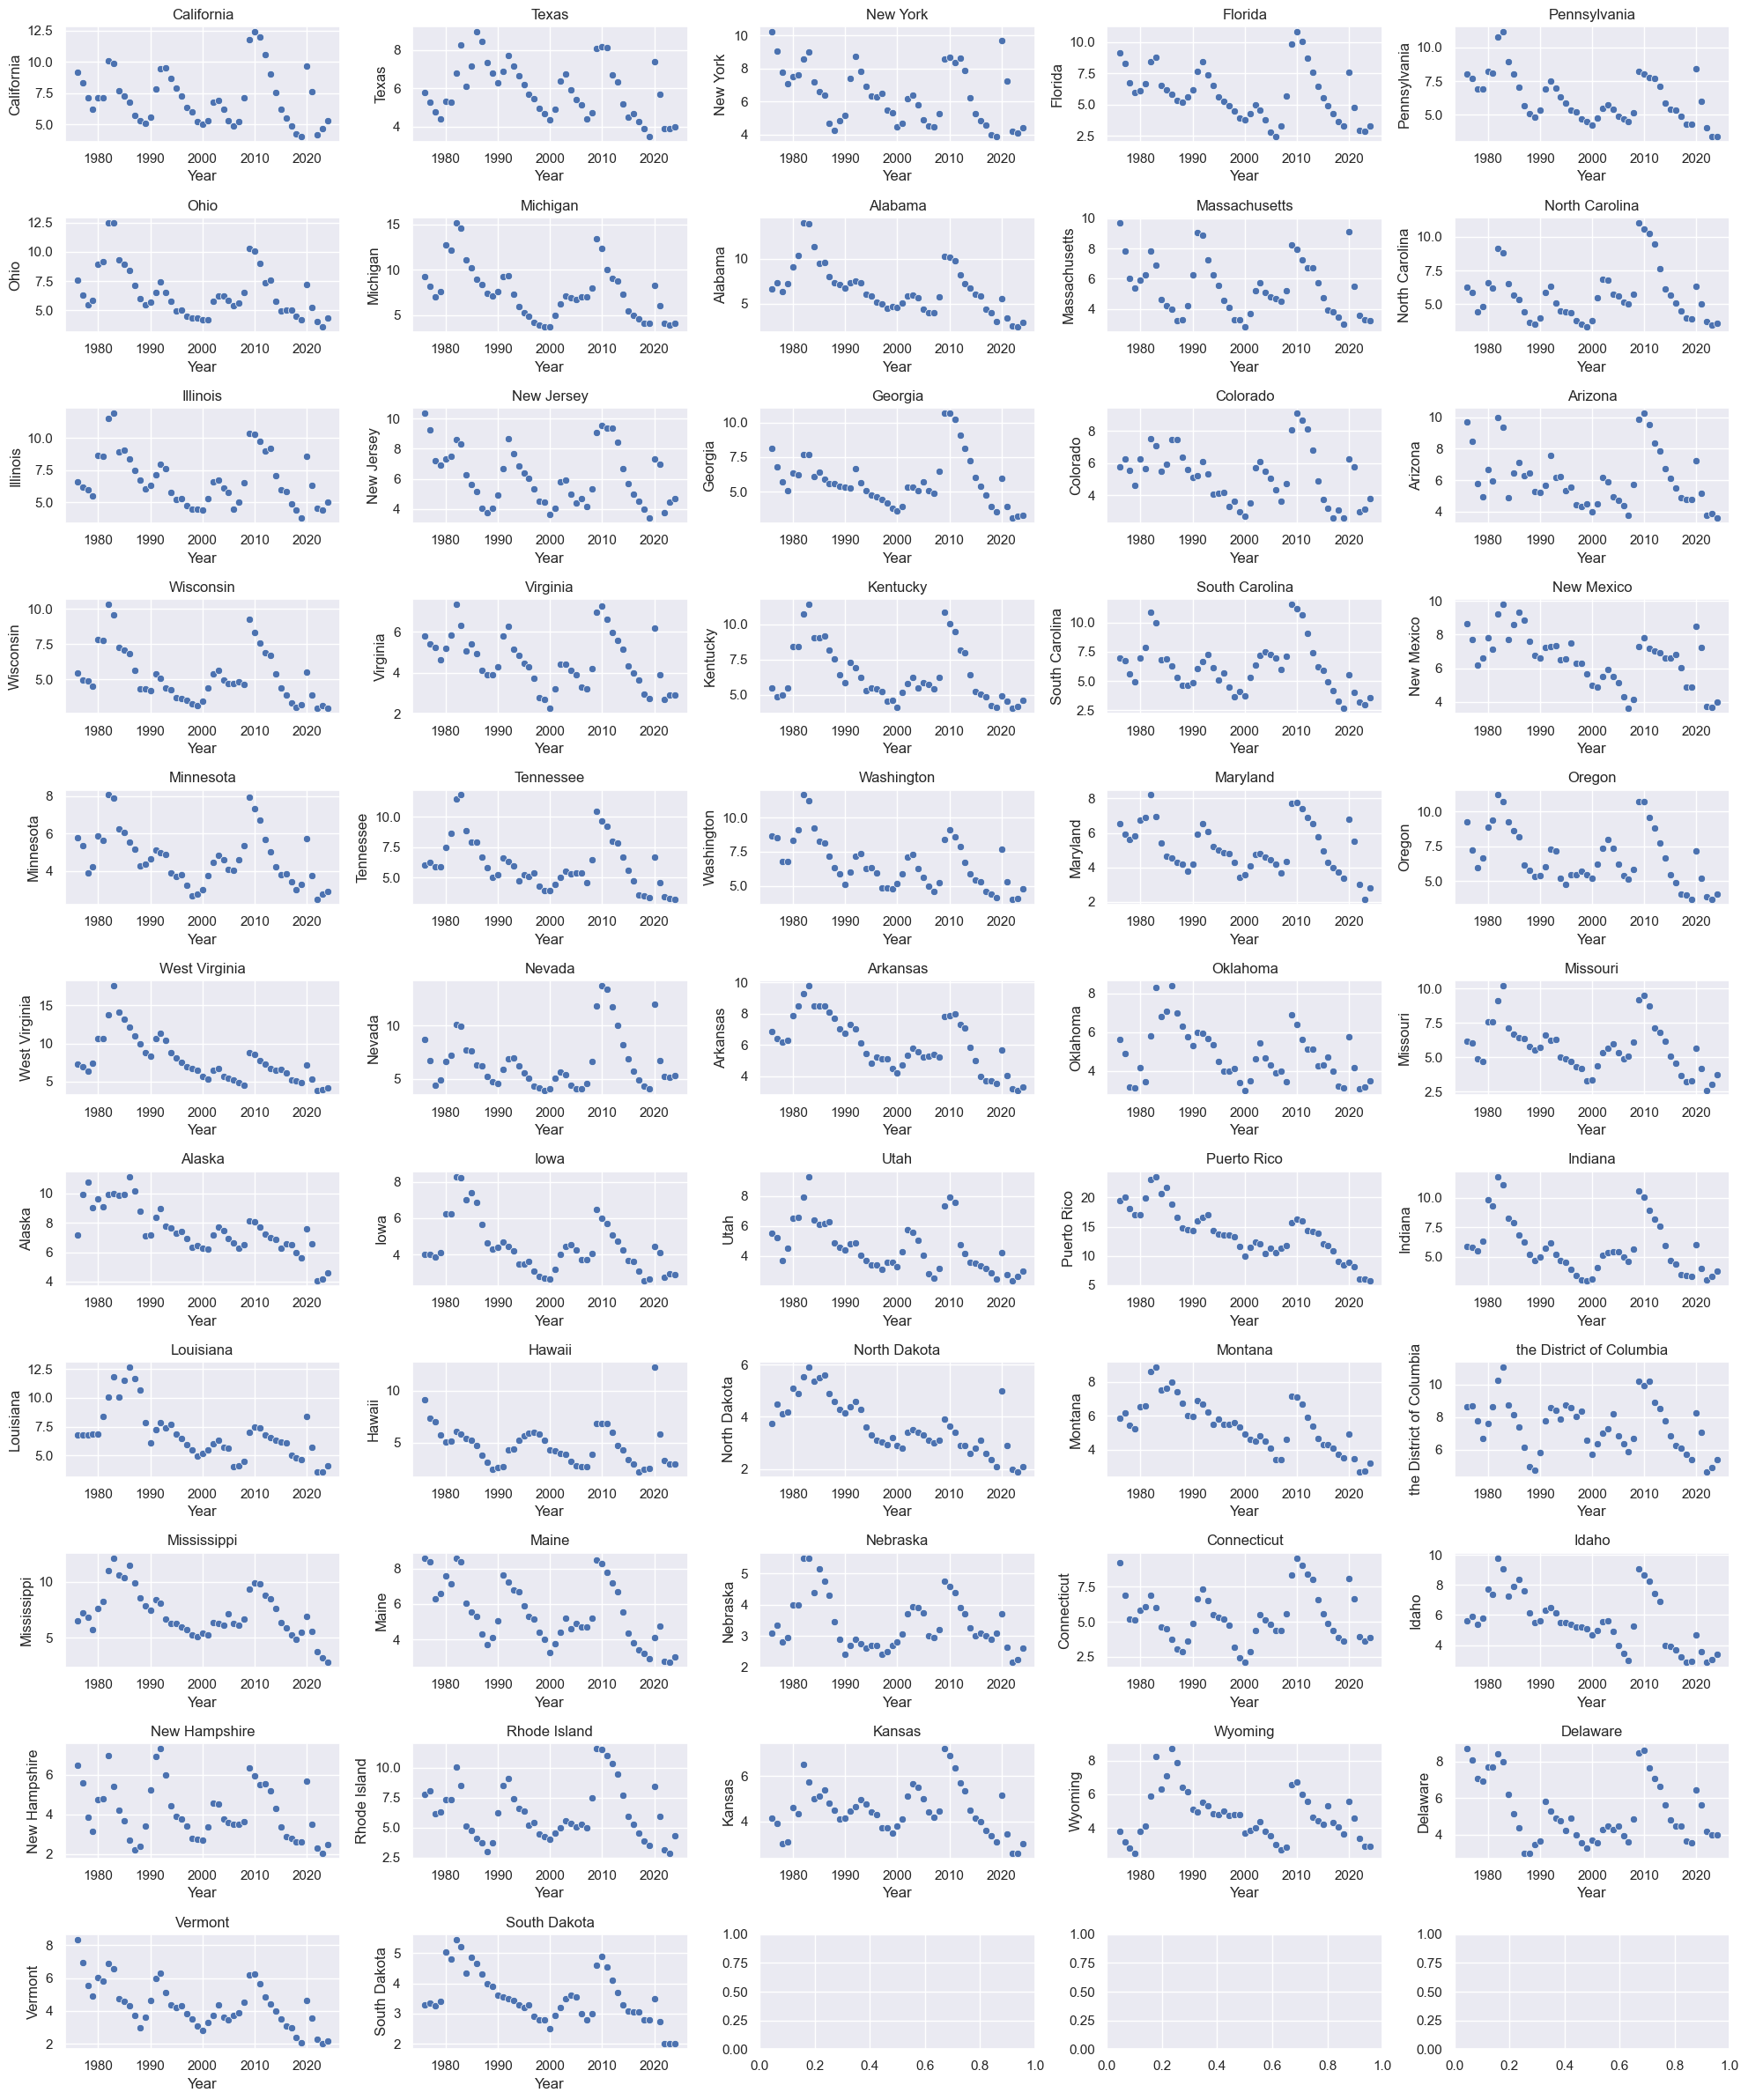

In [ ]:
df_median_unemp_rate_by_year = final_unemp_data_stetewise.groupby('Year').median()

# Create a figure and axes with 10 rows and 5 cols. 
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(20, 24))
# axes.flatten() converts this 2D array into a 1D array, making it easy to loop through all the subplots.
axes = axes.flatten()

# Loop through every single column of the data frame to display the line plot in multiple subplots.
itr = 0
for key,value in df_median_unemp_rate_by_year.items():    
    # Plot on the first subplot
    sns.lineplot(data=df_median_unemp_rate_by_year[key].to_frame(), x='Year', y=key, ax=axes[itr])
    axes[itr].set_title(key)
    itr+=1    

# Adjust spacing
plt.tight_layout()
plt.show()

### Top 5 States with Highest unemployment rate since 1976. Display a barplot for top 5 states based on the average unemployment rate.

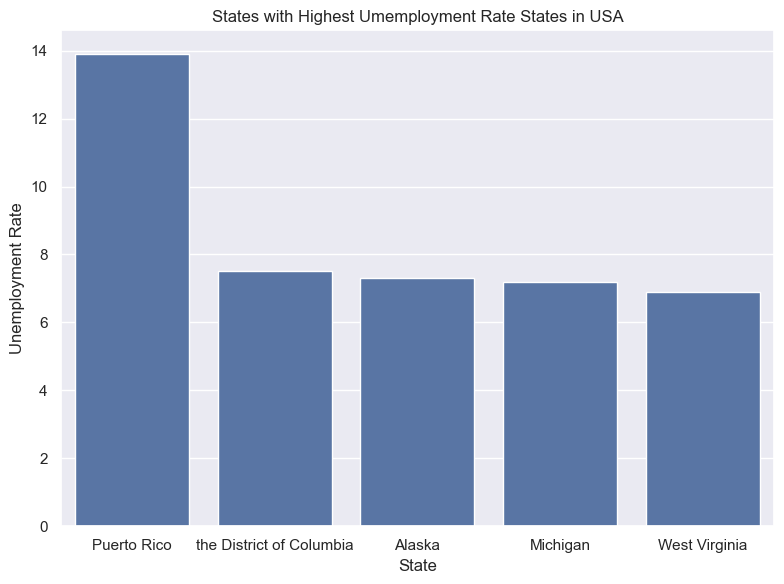

In [109]:
# Getting the median unemployment rate for every state since 1976 and sorting them in decending order to get the highest unemployment rates
ser_median_unemp_rate = final_unemp_data_stetewise.median().sort_values(ascending=False)
# Dropping the Year data from the dataset
ser_median_unemp_rate.drop('Year',axis=0,inplace=True)

#Getting the top 5 states based on highest unemployment rates
df_top_unemp_state = ser_median_unemp_rate.head().to_frame()
df_top_unemp_state.columns = ['Avg. UnEmp Rate']
df_top_unemp_state.index.rename('State',inplace=True)

# Display the content in a bar plot using the Seaborn plot
sns.set_theme(rc={'figure.figsize':(8, 6)}) 
sns.barplot(data=df_top_unemp_state,x='State',y='Avg. UnEmp Rate')

plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.title('States with Highest Umemployment Rate States in USA')

plt.tight_layout()
plt.show()

### Top 5 States with lowest unemployment rate since 1976. Display a barplot for top 5 states based on the average unemployment rate.

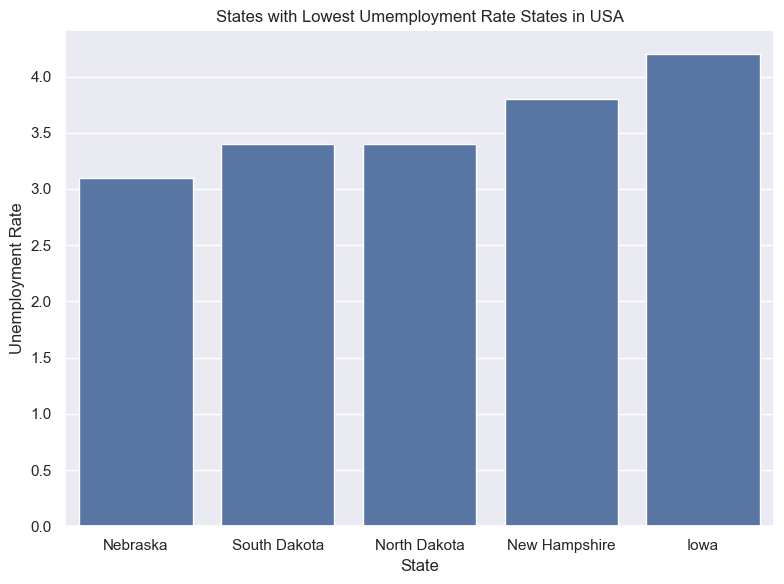

In [108]:
# Getting the median unemployment rate for every state since 1976 and sorting them in decending order to get the highest unemployment rates
ser_median_unemp_rate = final_unemp_data_stetewise.median().sort_values()
# Dropping the Year data from the dataset
ser_median_unemp_rate.drop('Year',axis=0,inplace=True)

#Getting the top 5 states based on highest unemployment rates
df_top_unemp_state = ser_median_unemp_rate.head().to_frame()
df_top_unemp_state.columns = ['Avg. UnEmp Rate']
df_top_unemp_state.index.rename('State',inplace=True)

# Display the content in a bar plot using the Seaborn plot
sns.set_theme(rc={'figure.figsize':(8, 6)}) 
sns.barplot(data=df_top_unemp_state,x='State',y='Avg. UnEmp Rate')

plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.title('States with Lowest Umemployment Rate States in USA')

plt.tight_layout()
plt.show()

### For every states identify the years where unempoyment rate is highest and Lowest.

In [164]:
df_unemp_data_grpby_yr =final_unemp_data_stetewise.groupby('Year').median()

df_yr_min_max_state = pd.DataFrame(columns=['State','Yr. Highest UnEmp','Yr. Lowest UnEmp'])

index = 0
for key,value in df_unemp_data_grpby_yr.items(): 
    if key == 'Year':
        continue  
    # Adding a series into the specific location of the dataframe. 
    df_yr_min_max_state.loc[index] = {'State': key,'Yr. Highest UnEmp':df_unemp_data_grpby_yr[df_unemp_data_grpby_yr[key]== value.max()][key].index.values, 'Yr. Lowest UnEmp' : df_unemp_data_grpby_yr[df_unemp_data_grpby_yr[key]== value.min()][key].index.values}
    index+=1

df_yr_min_max_state

,State,Yr. Highest UnEmp,Yr. Lowest UnEmp
0,California,[2010],[2019]
1,Texas,[1986],[2019]
2,New York,[1976],[2019]
3,Florida,[2010],[2006]
4,Pennsylvania,[1983],"[2023, 2024]"
5,Ohio,"[1982, 1983]",[2023]
6,Michigan,[1982],[1999]
7,Alabama,[1982],[2023]
8,Massachusetts,[1976],[2000]
9,North Carolina,[2009],[1999]
